### 1.多变量关系图

散点图 (scatter)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips", data_home="seaborn-data", cache=True)

In [19]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


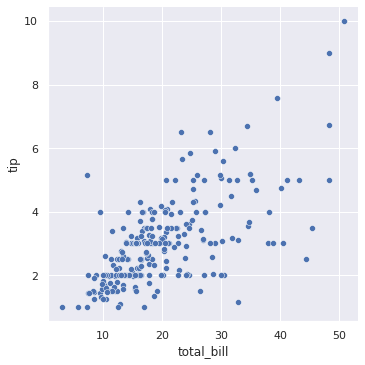

In [13]:
sns.relplot(x="total_bill", y="tip", data=tips)

线图 (line)

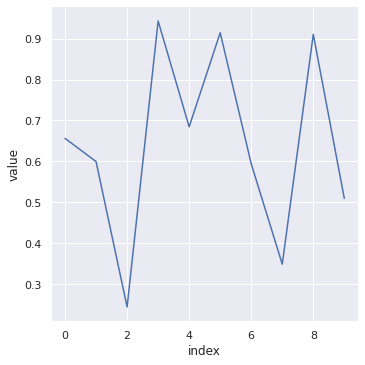

In [25]:
# kind的参数有scatter和line
df = pd.DataFrame({"index": range(10), "value": np.random.rand(10)})
sns.relplot(x="index", y="value", kind="line", data=df)

hue参数

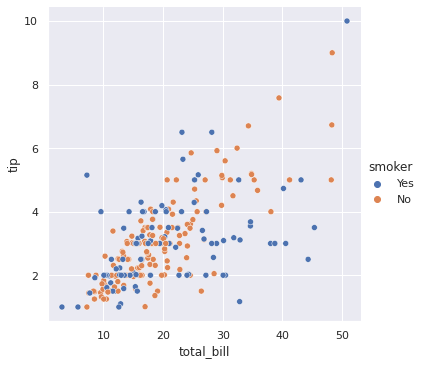

In [27]:
# 根据smoker的类别 (yes/no) 将两个类别的点染色
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

col参数

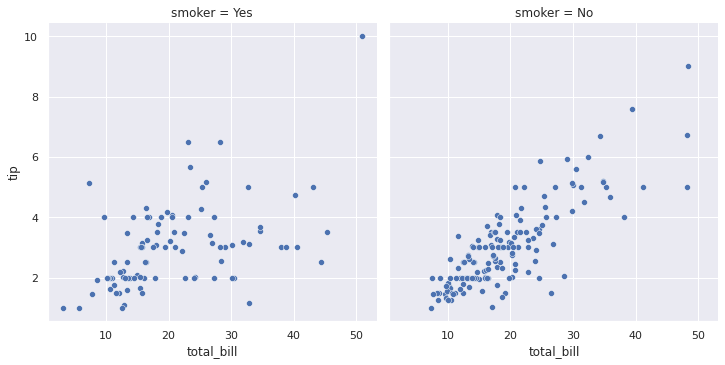

In [33]:
# 根据smoker的类别 (yes/no) 绘制两个不同的子图
sns.relplot(x="total_bill", y="tip", col="smoker", data=tips)

style参数

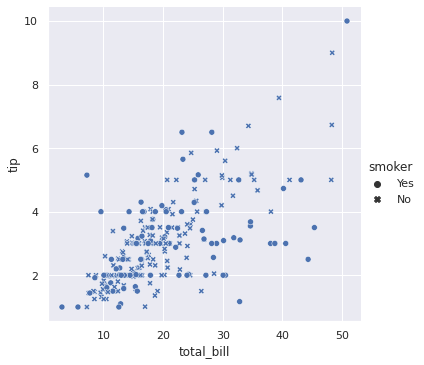

In [36]:
# 根据smoker的类别 (yes/no) 赋予两个类别不同风格的点
sns.relplot(x="total_bill", y="tip", style="smoker", data=tips)

其他参数：size (点/线的大小), row (多行子图，类似于col)

特殊线图

In [37]:
fmri = sns.load_dataset("fmri", data_home="seaborn-data", cache=True)

In [41]:
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


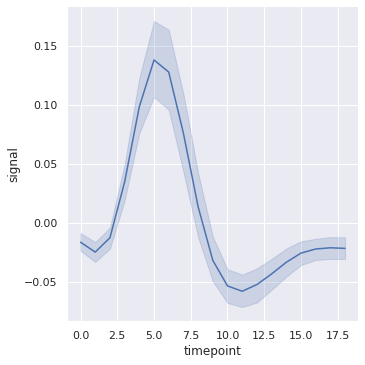

In [46]:
# 在同一个x下，有多个y，会出现下图震荡的效果
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

ci参数

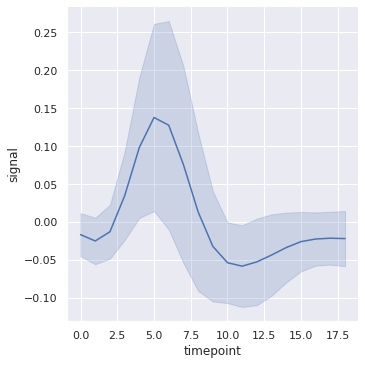

In [48]:
# ci="sd"绘制标准差
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

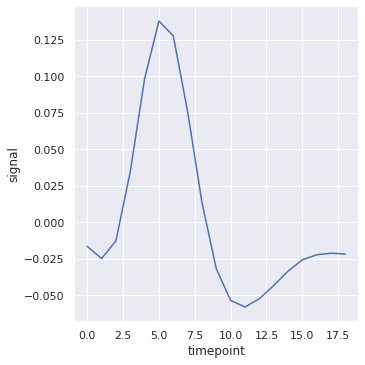

In [50]:
# ci=None不显示阴影
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri)

estimator参数

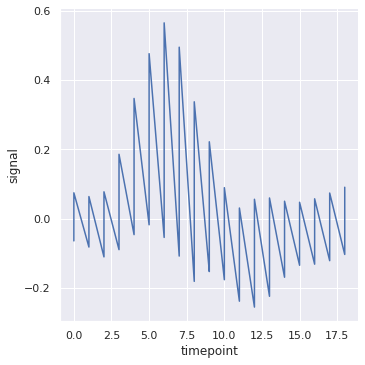

In [52]:
# estimator=None关闭聚合
sns.relplot(x="timepoint", y="signal", kind="line", estimator=None, data=fmri)

### 2.数据分布图

直方图

In [54]:
penguins = sns.load_dataset("penguins", data_home='seaborn-data', cache=True)

In [56]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


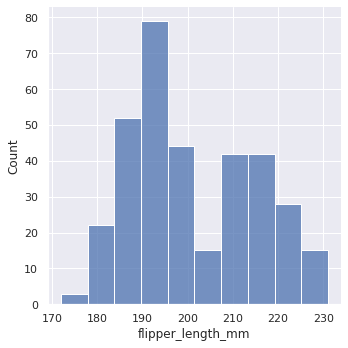

In [57]:
sns.displot(penguins, x="flipper_length_mm")

hue参数，multiple参数，stat参数

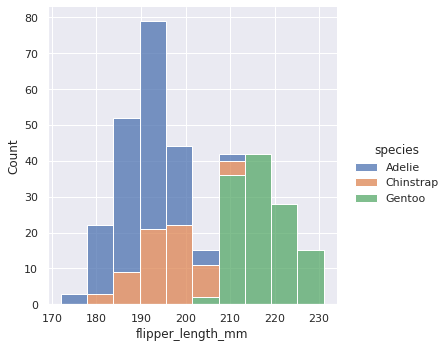

In [62]:
# multiple="stack"堆叠；multiple="dodge"独立
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

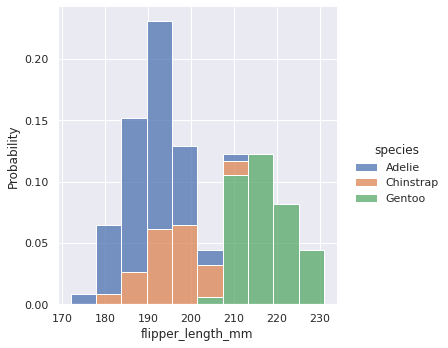

In [68]:
# stat="probability"归一化（"percent", "frequency", "density", "count"）
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack", stat="probability")

核密度估计图 (KDE图)

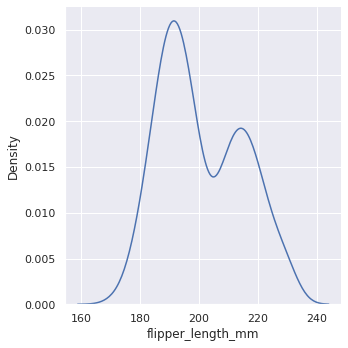

In [69]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

bw_adjust参数

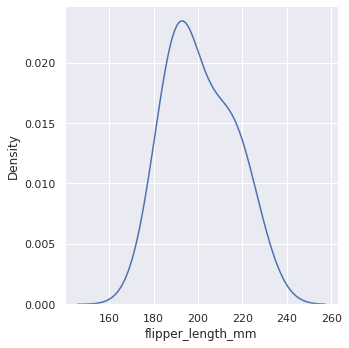

In [75]:
# bw_adjust调整高斯核函数的平滑程度
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

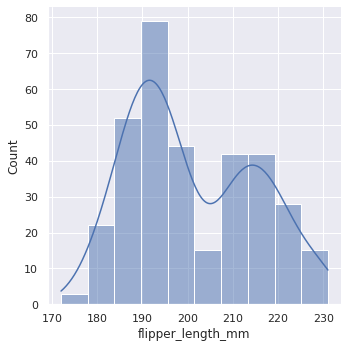

In [77]:
# kde=True同时绘制直方图和KDE图
sns.displot(penguins, x="flipper_length_mm", kde=True)

经验累积分布图 (ECDF)

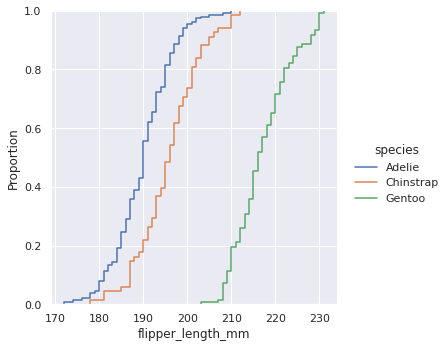

In [78]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

二元分布图

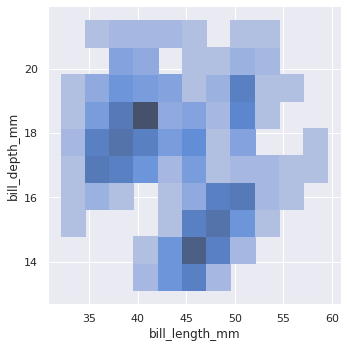

In [79]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

二元核密度估计图

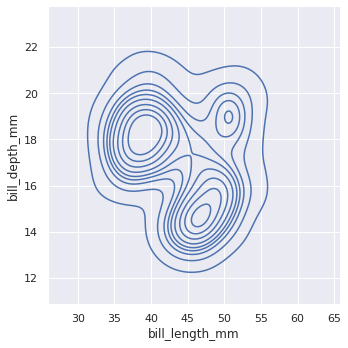

In [80]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

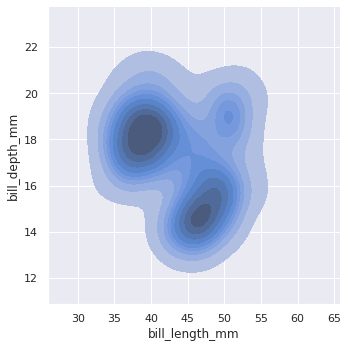

In [82]:
# fill=True定型观察面的高度
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", fill=True)

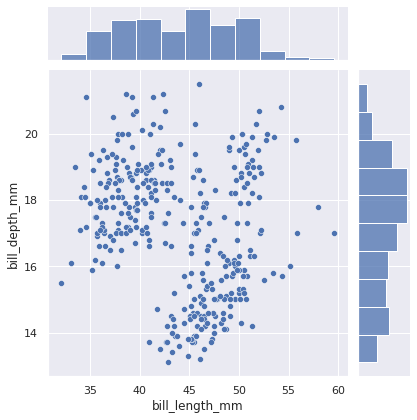

In [85]:
# jointplot直方图：同时绘制直方图和散点图
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

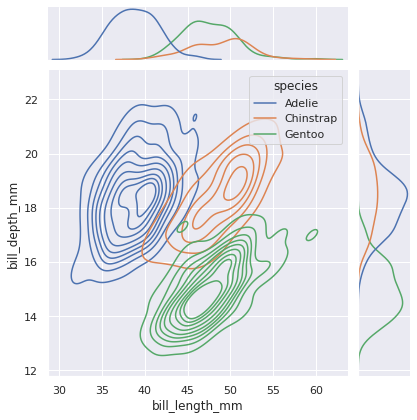

In [86]:
# jointplot KDE图
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

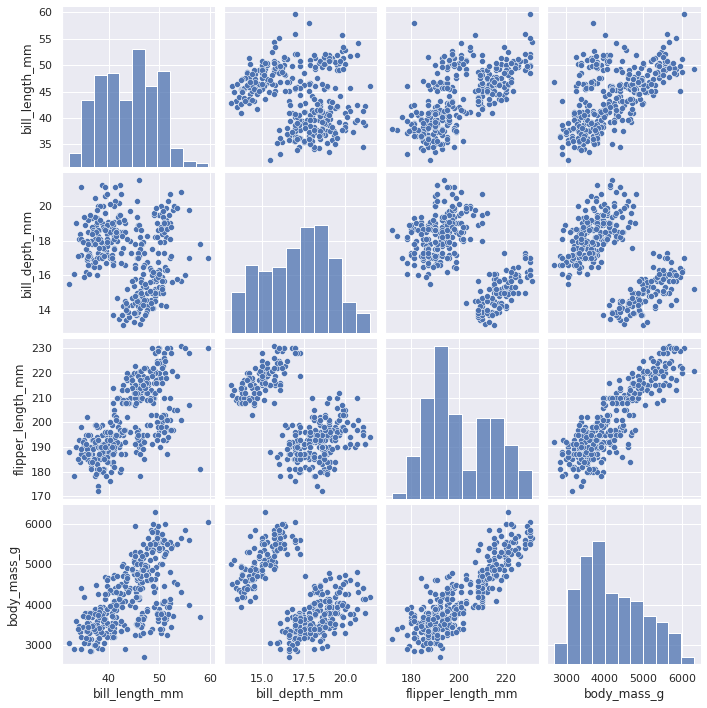

In [88]:
# 为更多变量绘图
sns.pairplot(penguins)

### 3.分类图

分类散点图

In [90]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


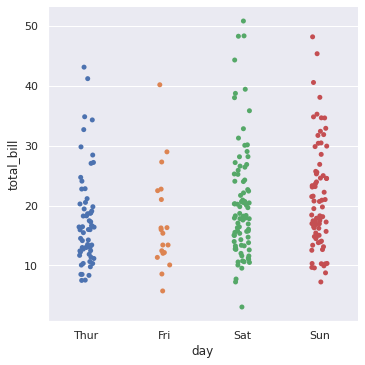

In [92]:
sns.catplot(x="day", y="total_bill", data=tips)

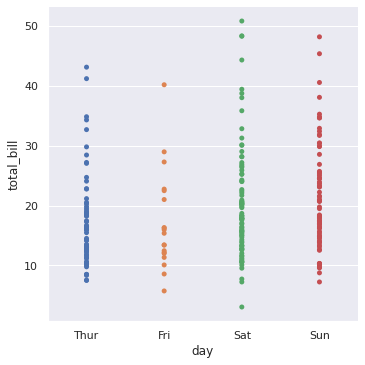

In [93]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

jitter参数

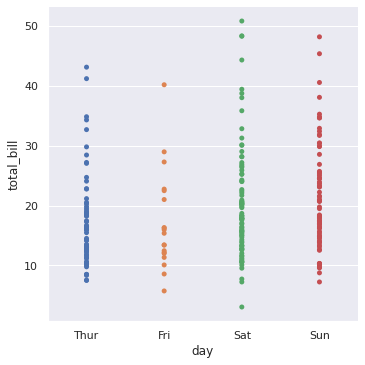

In [95]:
# jitter=False代表不抖动
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

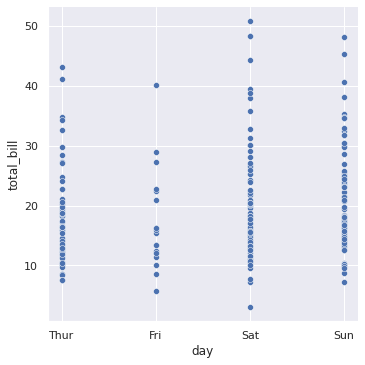

In [96]:
sns.relplot(x="day", y="total_bill", data=tips)

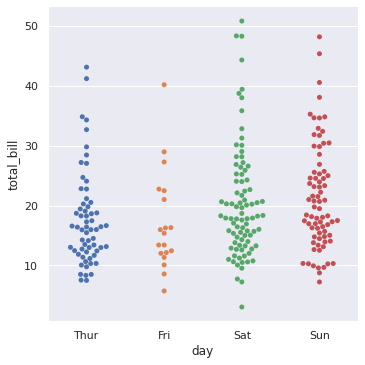

In [98]:
# kind="swarm"绘制非重叠的分类散点图
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

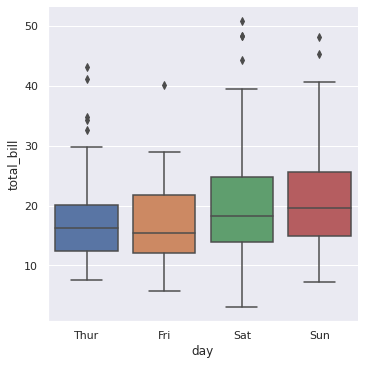

In [100]:
# kind="box"绘制箱线图
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

In [101]:
diamonds = sns.load_dataset("diamonds", data_home='seaborn-data', cache=True)

In [102]:
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


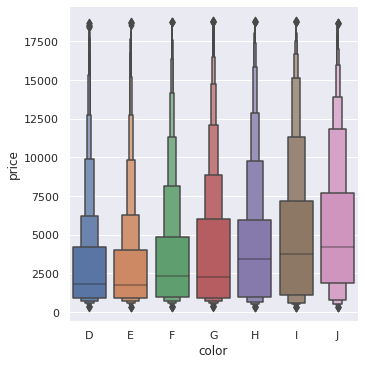

In [103]:
# kind="boxen"绘制增强箱线图
sns.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color"))

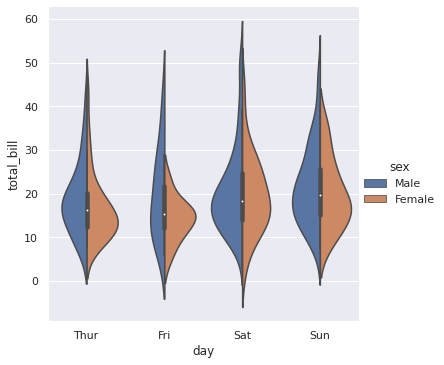

In [104]:
# kind="violin"绘制小提琴图
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)

分类估计图

In [105]:
titanic = sns.load_dataset("titanic", data_home='seaborn-data', cache=True)

In [106]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


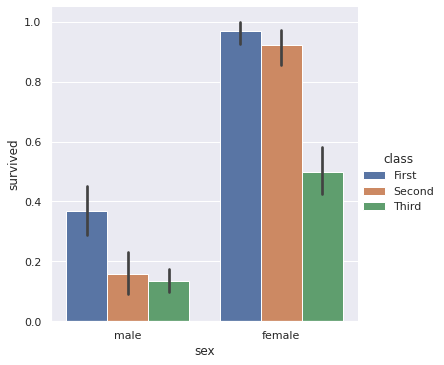

In [107]:
# kind="bar"以矩形展示点估计图
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

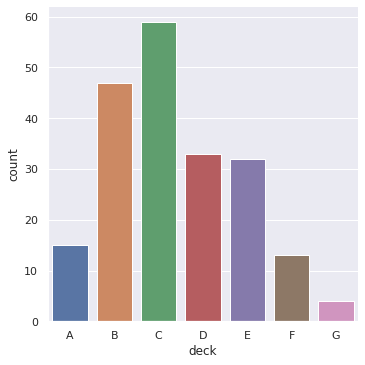

In [109]:
# kind="count"绘制柱状图
sns.catplot(x="deck", kind="count", data=titanic)

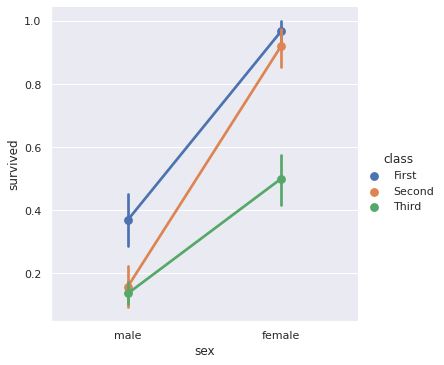

In [110]:
# kind="point"绘制点图
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

### 4.回归图

In [111]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


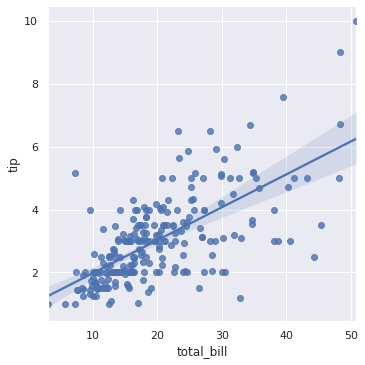

In [112]:
sns.lmplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

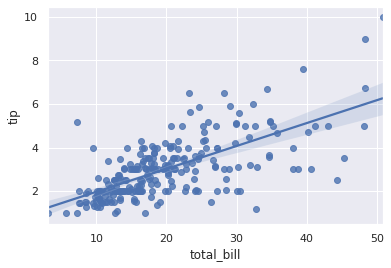

In [113]:
sns.regplot(x="total_bill", y="tip", data=tips)

order参数

In [114]:
anscombe = sns.load_dataset("anscombe", data_home='seaborn-data', cache=True)

In [115]:
anscombe.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


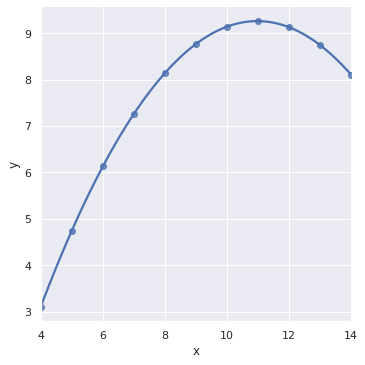

In [120]:
# order=2拟合多项式分布
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2)

logistic参数

/home/mxdong/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


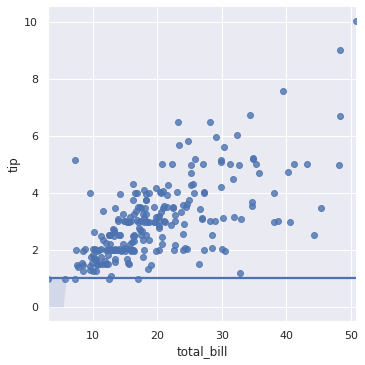

In [122]:
# logistic=True拟合逻辑回归
sns.lmplot(x="total_bill", y="tip", data=tips, logistic=True, y_jitter=.03)

### 5.多图网络

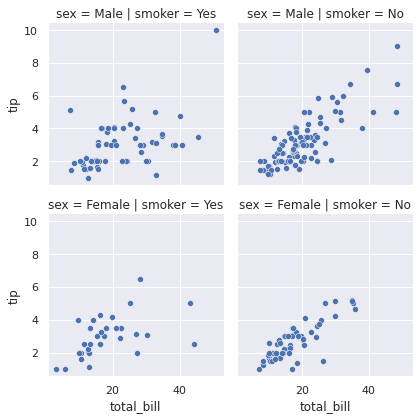

In [124]:
g = sns.FacetGrid(tips, row="sex", col="smoker")
g.map(sns.scatterplot, "total_bill", "tip")

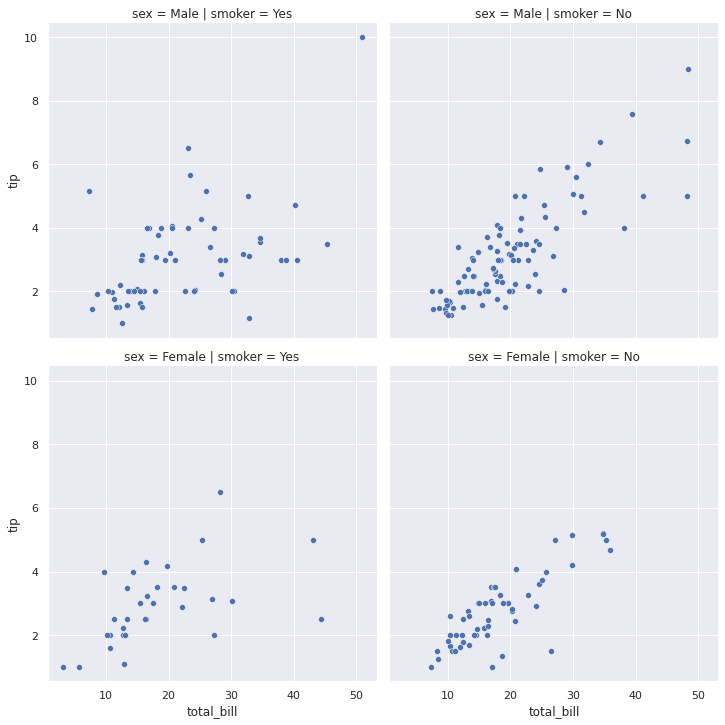

In [125]:
sns.relplot(x='total_bill', y='tip', row="sex", col="smoker", data=tips)

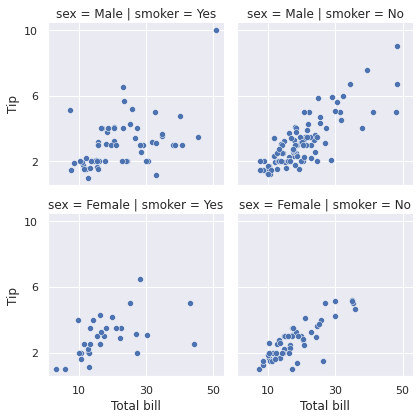

In [127]:
# 设置图形属性
g = sns.FacetGrid(tips, row="sex", col="smoker")
g.map(sns.scatterplot, "total_bill", "tip")
g.set_axis_labels("Total bill", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
# g.figure.subplots_adjust(wspace=.02, hspace=.02)

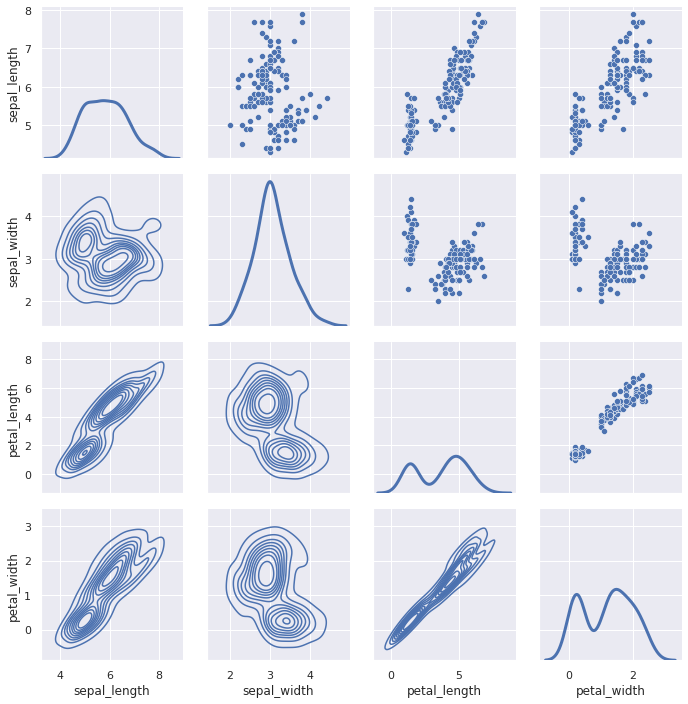

In [128]:
# PairGrid为多变量同时绘图
iris = sns.load_dataset("iris", data_home='seaborn-data', cache=True)
g = sns.PairGrid(iris)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

### 6.样式和调色板

https://pic3.zhimg.com/80/v2-42e23f936e23a9eeecedeb07f1d5d98e_720w.jpg